# Red Wine Quality Prediction Project

### Task - Need to build a classification model to predict the quality of Red Wine

Lets start with importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the data in the DataFrame

In [3]:
df=pd.read_csv('winequality.csv')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We have been ask to set the cut off for quality, 7 or higher as 'good'/1 and the remainder as 'not good'/0.
We will change this later after doing EDA.

In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

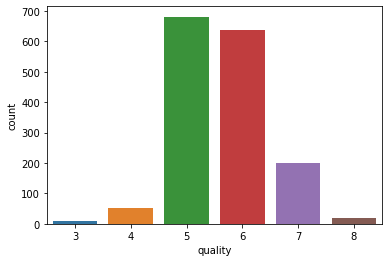

In [6]:
sns.countplot(x='quality',data=df)

From the above graph we can say that the quality of wine is mostly of average in the dataset

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


First 5 columns

In [8]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Last 5 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Our complete data consisist of nummeric values

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in the dataset

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


From the above summary we can see that outliers are present in most of the feature and it is positively skewed.

### EDA

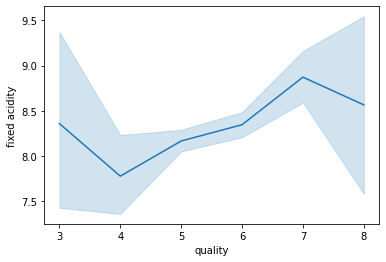

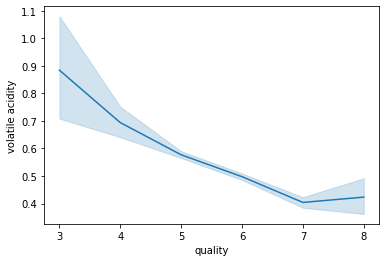

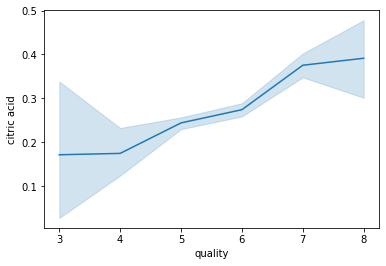

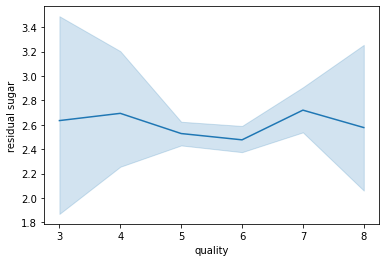

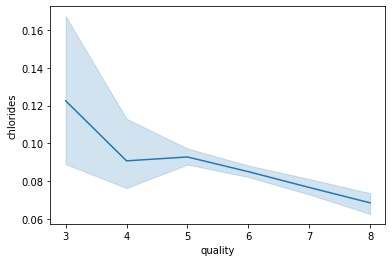

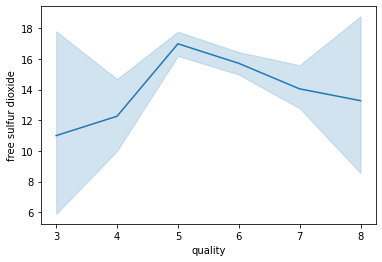

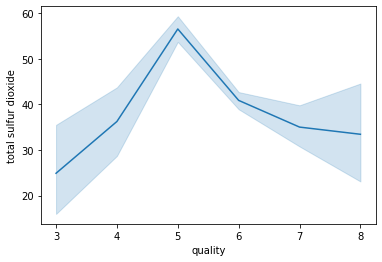

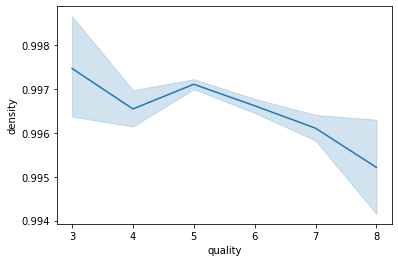

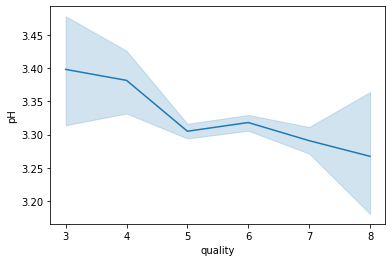

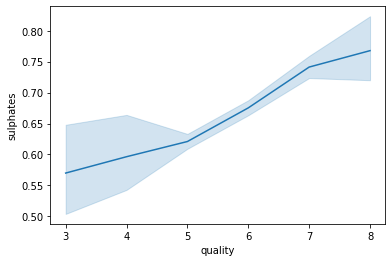

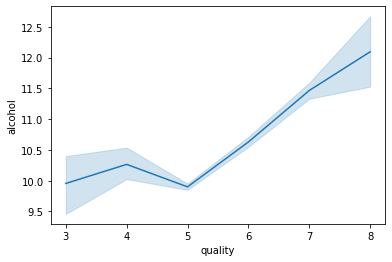

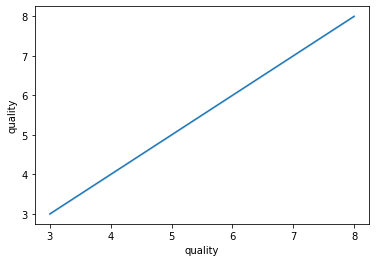

In [12]:
for i in df.columns:
    sns.lineplot(x='quality',y=i,data=df)
    plt.show()

Findings:

Increase in 'citric acid', 'sulphates' and 'alcohol' increases the quality of wine.

High range of 'volatile acidity' and 'chlorides' impact the quality of wine.

'fixed acidity', 'chlorides' and 'free sulfur dioxide' does not create much impact on the quality of wine

'residual sugar' and 'ph' has no impact on the overall quality of the wine. We can drop this column for model building.

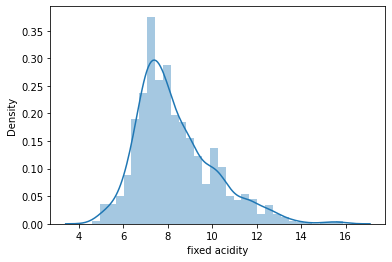

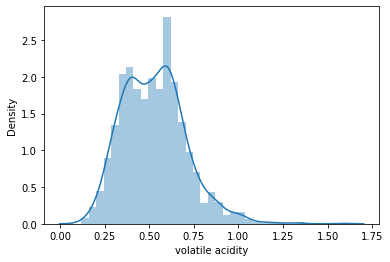

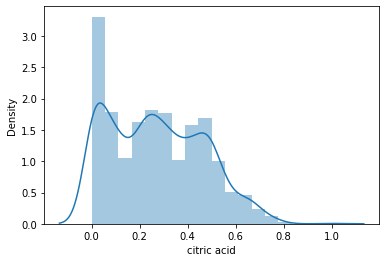

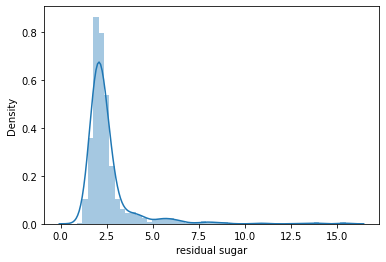

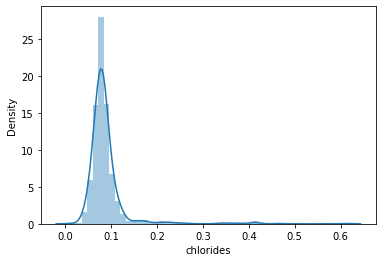

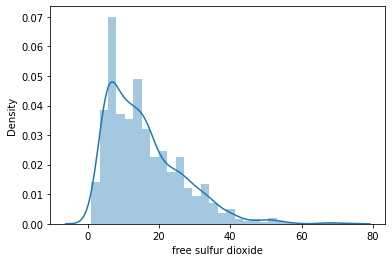

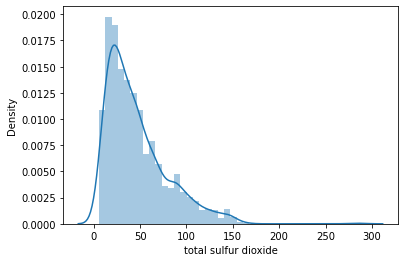

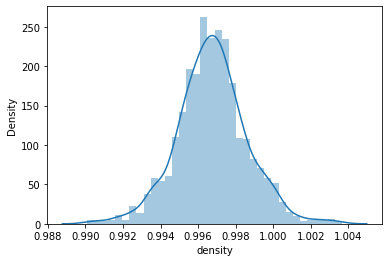

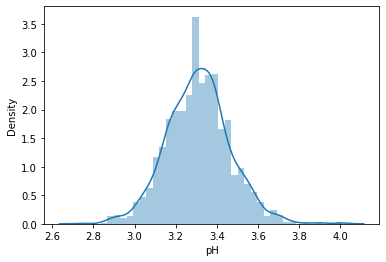

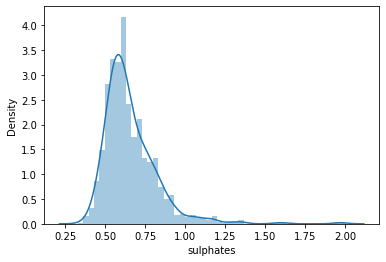

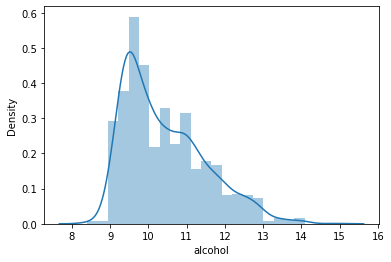

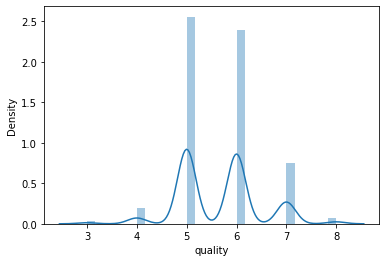

In [13]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Most of the data is normally distributed.

'residual sugar' and 'chlorides' is right skewed.

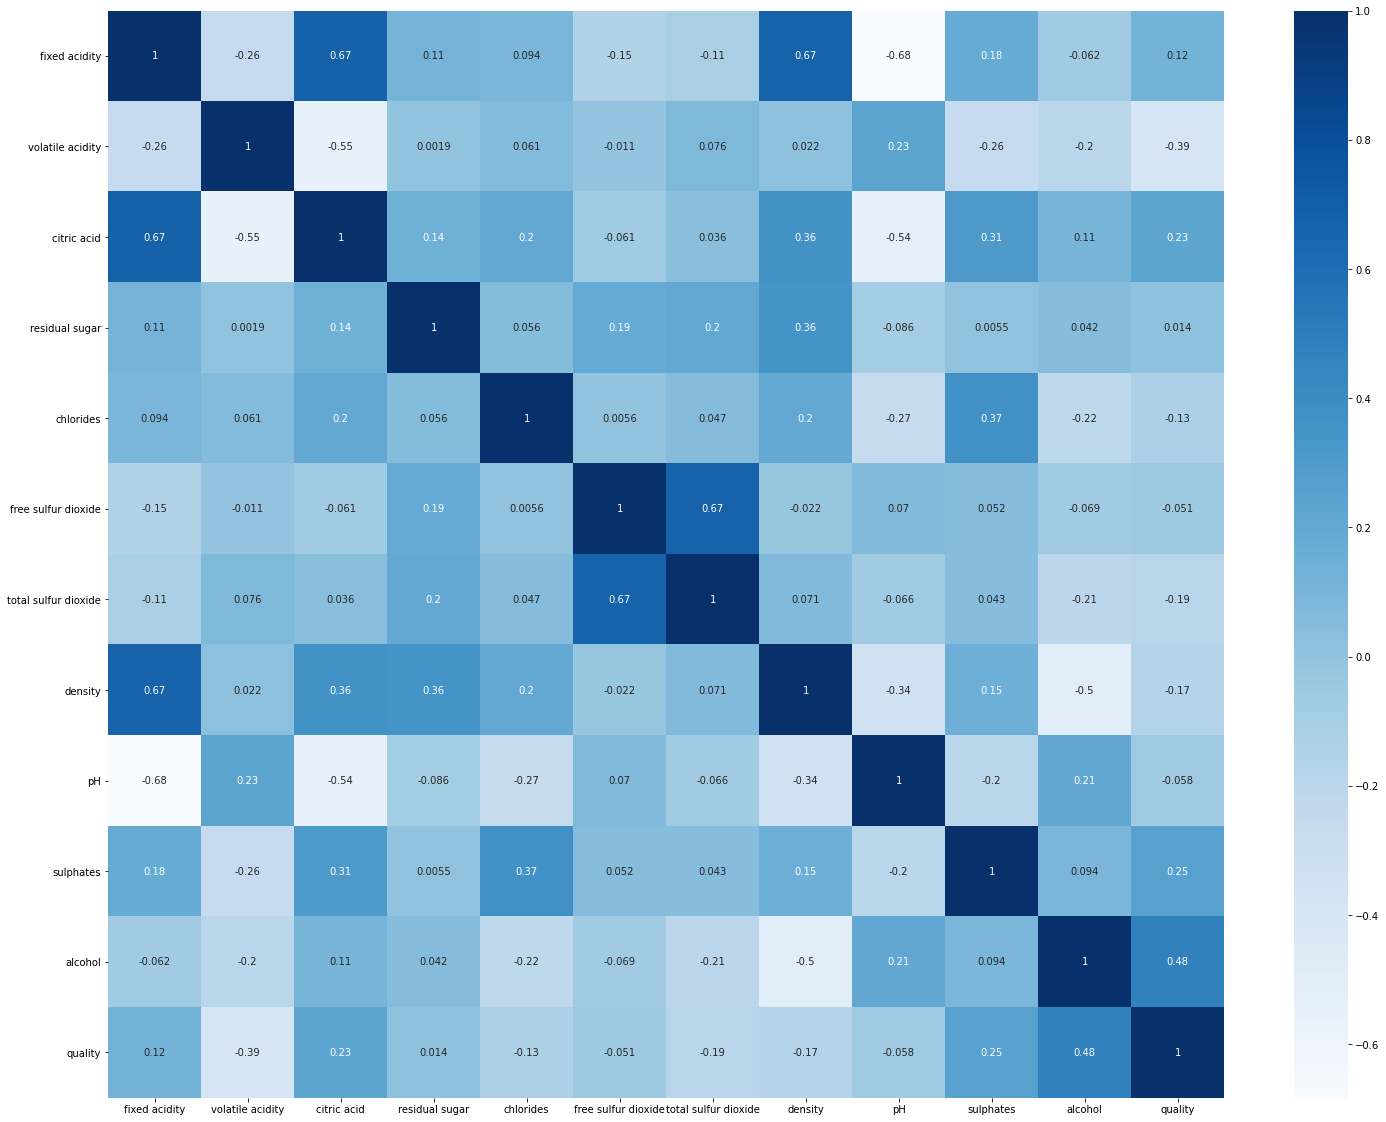

In [14]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap='Blues',annot=True)

There is not much of a corelaion between any features.

Infact none of the feature has corerlation above 0.70 with each other.

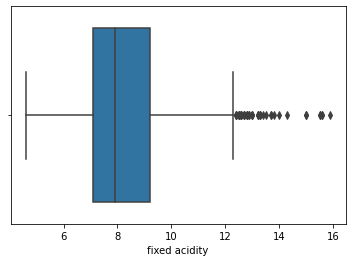

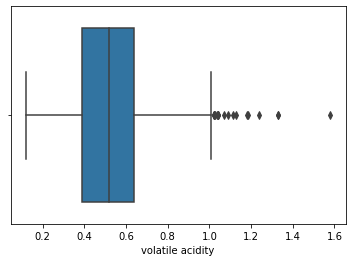

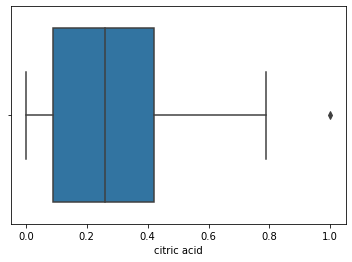

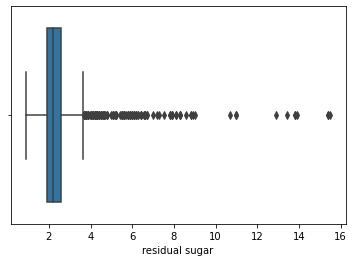

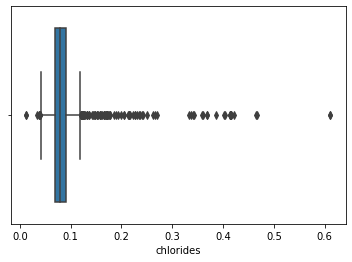

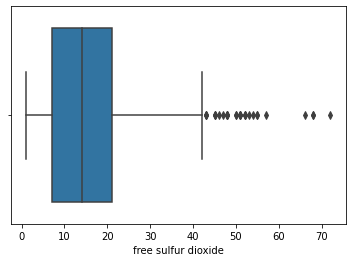

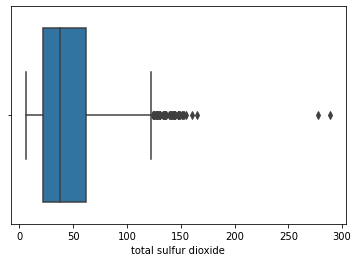

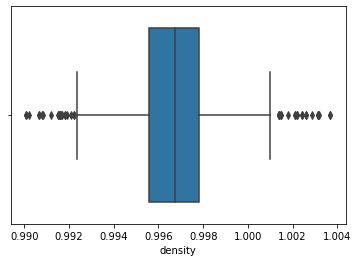

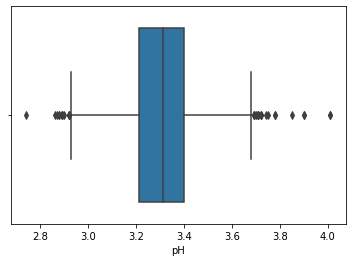

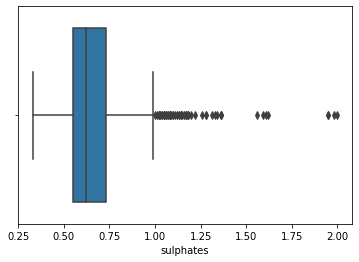

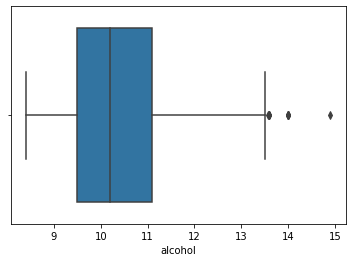

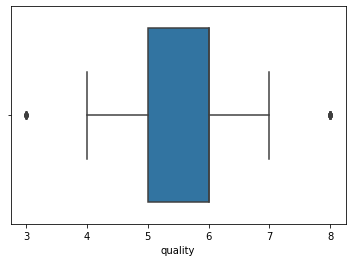

In [15]:
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

There are many outliers present in the data. Our dataset is not huge and consist of only 1599 rows hence we have to check how much data we will lose if we remove the ouliers

In [16]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Our data is highly skewed. We will have to remove the skewness for our model to perform well

### Steps to take forward from EDA

1. Drop less correlated columns 'residual sugar' and 'ph'
2. Distribute 'quality' columns as good/1 and notgood/0
3. Remove outliers without losing much data
4. Check for skewness and reduce it

### Data Pre-processing

In [17]:
df.drop(['residual sugar','pH'],axis=1,inplace=True)

Dropping the feature with less impact on quality of wine

In [18]:
df

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,0.71,10.2,5


Columns has been reduced from 12 to 10

In [19]:
df['quality'] = np.where((df.quality >= 7), 1, 0)

Changing the quality feature to 0 and 1, quality rating equal to or above 7 has been assigned as 1(good), anthing below 7 will be conisder as 0(notgood)

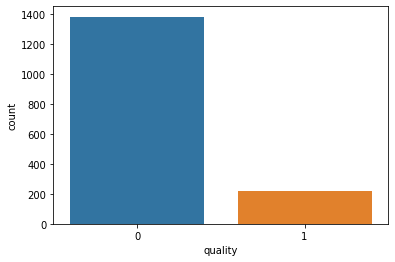

In [20]:
sns.countplot(x='quality',data=df)

The data is imbalance. we have to treat the imbalance data for the model fitting

We will review the same after working on the outliers and skew

In [21]:
from scipy.stats import zscore

In [22]:
z=np.abs(zscore(df.drop(columns=['quality'])))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.55827446, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.02826077, 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.13426351, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.53355375, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.67665745, 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.66605717, 0.01092425,
        0.54162988]])

We are not removing outliers from the Quality as that is the categorical data we have converted into

In [23]:
print('shape before removing the outliers:', df.shape)
 
dfnew=df[(z<3).all(axis=1)]
 
print('shape after removing the outliers:', dfnew.shape)

shape before removing the outliers: (1599, 10)
shape after removing the outliers: (1483, 10)


Data after removing the outliers

In [ ]:
100-((1483/1599)*100)

7.254534083802383

We have lost 7.25% of the data after removing the outliers, which is relatively ok.

Now let's check for skewness

In [24]:
dfnew.skew()

fixed acidity           0.793077
volatile acidity        0.385444
citric acid             0.304663
chlorides               2.270552
free sulfur dioxide     0.850137
total sulfur dioxide    1.156051
density                 0.043847
sulphates               0.903161
alcohol                 0.753694
quality                 2.114961
dtype: float64

In [25]:
from scipy.stats import boxcox

We will be removing skew using boxcox and cuberoot method

In [26]:
ds=dfnew

In [27]:
bc, var=boxcox(ds['chlorides'])

Applying boxcox on chlorides

In [28]:
dfnew['chlorides'],var=boxcox(ds['chlorides'])

In [29]:
dfnew['chlorides'].skew()

-0.056486101824036086

In [30]:
dfnew.skew()

fixed acidity           0.793077
volatile acidity        0.385444
citric acid             0.304663
chlorides              -0.056486
free sulfur dioxide     0.850137
total sulfur dioxide    1.156051
density                 0.043847
sulphates               0.903161
alcohol                 0.753694
quality                 2.114961
dtype: float64

In [31]:
bc, var=boxcox(ds['total sulfur dioxide'])

Applying boxcox on total sulfur dioxide

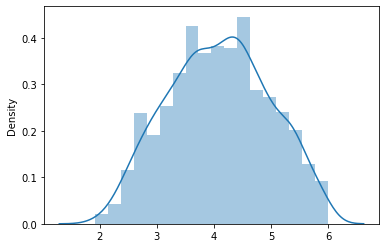

In [32]:
sns.distplot(bc)

 We can see now that the data looks normally dustributed

In [33]:
dfnew['total sulfur dioxide'],var=boxcox(ds['total sulfur dioxide'])

In [34]:
dfnew.skew()

fixed acidity           0.793077
volatile acidity        0.385444
citric acid             0.304663
chlorides              -0.056486
free sulfur dioxide     0.850137
total sulfur dioxide   -0.011942
density                 0.043847
sulphates               0.903161
alcohol                 0.753694
quality                 2.114961
dtype: float64

Will apply the cuberoot method to remove skewness from other features

In [35]:
ds=dfnew

In [36]:
ds.skew()

fixed acidity           0.793077
volatile acidity        0.385444
citric acid             0.304663
chlorides              -0.056486
free sulfur dioxide     0.850137
total sulfur dioxide   -0.011942
density                 0.043847
sulphates               0.903161
alcohol                 0.753694
quality                 2.114961
dtype: float64

In [37]:
columns=['fixed acidity','free sulfur dioxide','sulphates','alcohol']
 
for i in columns:
    ds[i]=np.cbrt(ds[i])

In [38]:
ds.skew()

fixed acidity           0.483249
volatile acidity        0.385444
citric acid             0.304663
chlorides              -0.056486
free sulfur dioxide     0.115106
total sulfur dioxide   -0.011942
density                 0.043847
sulphates               0.535850
alcohol                 0.641651
quality                 2.114961
dtype: float64

Splitting the data into input and output variable

In [39]:
x=ds.drop(columns='quality')
y=ds['quality']

Checking both the variable

In [40]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,1.948695,0.700,0.00,-4.225805,2.223980,4.021228,0.99780,0.824257,2.110454
1,1.983192,0.880,0.00,-3.616401,2.924018,4.920517,0.99680,0.879366,2.139975
2,1.983192,0.760,0.04,-3.762722,2.466212,4.629707,0.99700,0.866239,2.139975
3,2.237378,0.280,0.56,-4.259094,2.571282,4.771179,0.99800,0.833955,2.139975
4,1.948695,0.700,0.00,-4.225805,2.223980,4.021228,0.99780,0.824257,2.110454
...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.600,0.08,-3.814402,3.174802,4.357811,0.99490,0.833955,2.189760
1595,1.806969,0.550,0.10,-4.755292,3.391211,4.553411,0.99512,0.912581,2.237378
1596,1.846915,0.510,0.13,-4.225805,3.072317,4.232651,0.99574,0.908560,2.223980
1597,1.806969,0.645,0.12,-4.259094,3.174802,4.357811,0.99547,0.892112,2.168703


In [42]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1483, dtype: int64

In [43]:
y.value_counts()

0    1280
1     203
Name: quality, dtype: int64

From above we can see that the dataset is imbalance. We need to treat the same.

We will use oversampling technique to balance our data.

Importing SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)

In [46]:
y_new=pd.DataFrame(data=Y)

In [47]:
y_new.value_counts()

1    1280
0    1280
dtype: int64

We can see that the data is now evenly balanced.

Lets check the input variable as well

In [48]:
x_new=pd.DataFrame(data=X)

In [49]:
x_new

,0,1,2,3,4,5,6,7,8
0,1.948695,0.700000,0.000000,-4.225805,2.223980,4.021228,0.997800,0.824257,2.110454
1,1.983192,0.880000,0.000000,-3.616401,2.924018,4.920517,0.996800,0.879366,2.139975
2,1.983192,0.760000,0.040000,-3.762722,2.466212,4.629707,0.997000,0.866239,2.139975
3,2.237378,0.280000,0.560000,-4.259094,2.571282,4.771179,0.998000,0.833955,2.139975
4,1.948695,0.700000,0.000000,-4.225805,2.223980,4.021228,0.997800,0.824257,2.110454
...,...,...,...,...,...,...,...,...,...
2555,2.072351,0.120000,0.450000,-4.259094,2.154435,3.408925,0.995520,0.912581,2.283051
2556,2.088347,0.405377,0.334340,-3.871221,2.189728,4.469021,0.998964,0.906744,2.183428
2557,2.030691,0.412821,0.274907,-4.086473,2.269134,3.855986,0.996310,0.916128,2.246625
2558,2.317592,0.339088,0.705255,-3.709473,2.171004,3.810212,0.999487,0.890809,2.210419




We will now Standardize our dataset using StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc=StandardScaler()

In [52]:
sc_x=sc.fit_transform(x_new)

In [53]:
sc_x

array([[-0.6458913 ,  1.40475447, -1.64669194, ...,  0.76641391,
        -0.96802446, -1.39654845],
       [-0.38608463,  2.51402209, -1.64669194, ...,  0.20265228,
         0.02061585, -0.99717534],
       [-0.38608463,  1.77451034, -1.43763185, ...,  0.31540461,
        -0.21487639, -0.99717534],
       ...,
       [-0.02835947, -0.36501663, -0.20988946, ..., -0.07384504,
         0.68011379,  0.44564647],
       [ 2.13234764, -0.81940205,  2.03932626, ...,  1.71740189,
         0.2259102 , -0.04416792],
       [ 0.96046602, -0.93175518,  0.87747695, ..., -0.0675474 ,
         0.65568853,  0.27540821]])

We have done the data pre-processing. Lets move forward for building the model

### Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Importing the libraries for model fitting and checking the score

We will check the best possible random state to train our model. Using KNeighborsClassiifer to check and then later will run with other models

In [55]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(sc_x,y_new,test_size=.30,random_state=i)
    mod=KNeighborsClassifier(n_neighbors=5)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.91796875  on Random state 164


We can see that the best random state is 164. We will split the data with this random state

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=164)

We will train and test the data using different classification Model

Creating instance for the model

In [57]:
lg=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)

Running the for loop to check all the model accuracy

In [58]:
model=(lg,rfc,dt,sv,knn)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8808988764044944
[[386   6]
 [ 47   6]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       392
           1       0.50      0.11      0.18        53

    accuracy                           0.88       445
   macro avg       0.70      0.55      0.56       445
weighted avg       0.84      0.88      0.85       445

Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_im

Best accuracy has been given by RandomForestClassifier(RFC) model - Accuracy:92%

We have to verify if the our model is overfitting or underfitting.
For that we have to use Crosss validation.

Importing the libraries for cross validation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
model=(lg,rfc,dt,sv,knn)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8691828191828191


Mean Accuracy of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8786104286104287


Mean Accuracy of DecisionTreeClassifier(ccp_alpha=0

Again on cross validation RFC model gave best result of 87.86% accuracy

Lets check or all the model performance on Test accuracy and cross validation

In [1]:
Report={'Model':['LogisticR','RFC','DTC','SVC','KNN'],
        'Acc_test':[0.88,0.92,0.85,0.88,0.85],
        'Acc_cross':[0.86,0.87,0.81,0.86,0.83],
        'Difference':[0.88-0.86,0.92-0.87,0.85-0.81,0.88-0.86,0.85-0.83],}

In [4]:
Accuracy=pd.DataFrame(data=Report)

In [5]:
Accuracy

,Model,Acc_test,Acc_cross,Difference
0,LogisticR,0.88,0.86,0.02
1,RFC,0.92,0.87,0.05
2,DTC,0.85,0.81,0.04
3,SVC,0.88,0.86,0.02
4,KNN,0.85,0.83,0.02




### ROC_AUC

We will check the performance of all our model through ROC_AUC curve

In [61]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
 
from sklearn.metrics import roc_auc_score

Lets check the AUC_score of each model

In [62]:
model=(lg,rfc,dt,sv,knn)
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]    
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')

AUC Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.5489507123604158


AUC Score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7960146322680015


AUC Score of DecisionTreeClassifier(ccp_alpha=0.0, class_we

RFC has shown the best performance with AUC score of 79%

Plotting the ROC_AUC curve with the help of True positive rate(tpr) and False positive rate(fpr)

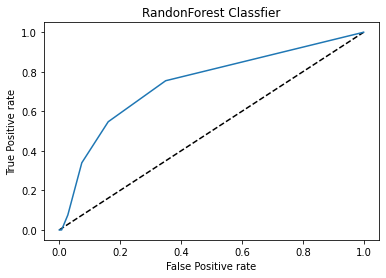

In [63]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classiifer')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandonForest Classfier')
plt.show()

### HyperTuning of the model (RFC)

Importing GridSearchCV which we use for hypertuning

In [64]:
from sklearn.model_selection import GridSearchCV

We will use below parameters for tuning our model

In [71]:
parameters={'n_estimators':[100,250,500],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

In [72]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

Training the model to find the best parameters

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [74]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 250}

Above are the best parameters we have got from GCV

Mow lets train our model with this parameters

In [76]:
Finalmod=RandomForestClassifier(n_estimators=250, max_depth=9, criterion='gini')
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.91011235955057


The model has given us the 92% accuracy

Lets check the AUC score with this model

In [78]:
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]    
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))
print('AUC Score of', Finalmod)
print(auc_score)

AUC Score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.766437235271467


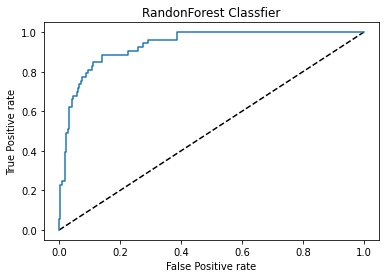

In [80]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classiifer')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandonForest Classfier')
plt.show()

## Conclusion

RFC model has given us the accuracy of 92% with ROC_AUC score of 76%.

We will save this project now

In [ ]:
import joblib
joblib.dump(Finalmod,'Red_wine_quality.obj')

['Red_wine_quality.obj']